<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/58/Uber_logo_2018.svg/1024px-Uber_logo_2018.svg.png" alt="UBER LOGO" width="50%" />

# UBER Pickups 

## Company's Description 📇

<a href="http://uber.com/" target="_blank">Uber</a> is one of the most famous startup in the world. It started as a ride-sharing application for people who couldn't afford a taxi. Now, Uber expanded its activities to Food Delivery with <a href="https://www.ubereats.com/fr-en" target="_blank">Uber Eats</a>, package delivery, freight transportation and even urban transportation with <a href="https://www.uber.com/fr/en/ride/uber-bike/" target="_blank"> Jump Bike</a> and <a href="https://www.li.me/" target="_blank"> Lime </a> that the company funded. 


The company's goal is to revolutionize transportation accross the globe. It operates now on about 70 countries and 900 cities and generates over $14 billion revenue! 😮


## Project 🚧

One of the main pain point that Uber's team found is that sometimes drivers are not around when users need them. For example, a user might be in San Francisco's Financial District whereas Uber drivers are looking for customers in Castro.  

(If you are not familiar with the bay area, check out <a href="https://www.google.com/maps/place/San+Francisco,+CA,+USA/@37.7515389,-122.4567213,13.43z/data=!4m5!3m4!1s0x80859a6d00690021:0x4a501367f076adff!8m2!3d37.7749295!4d-122.4194155" target="_blank">Google Maps</a>)

Eventhough both neighborhood are not that far away, users would still have to wait 10 to 15 minutes before being picked-up, which is too long. Uber's research shows that users accept to wait 5-7 minutes, otherwise they would cancel their ride. 

Therefore, Uber's data team would like to work on a project where **their app would recommend hot-zones in major cities to be in at any given time of day.**  

## Goals 🎯

Uber already has data about pickups in major cities. Your objective is to create algorithms that will determine where are the hot-zones that drivers should be in. Therefore you will:

* Create an algorithm to find hot zones 
* Visualize results on a nice dashboard 

## Scope of this project 🖼️

To start off, Uber wants to try this feature in New York city. Therefore you will only focus on this city. Data can be found here: 

👉👉<a href="https://full-stack-bigdata-datasets.s3.eu-west-3.amazonaws.com/Machine+Learning+non+Supervis%C3%A9/Projects/uber-trip-data.zip" target="_blank"> Uber Trip Data</a> 👈👈

**You only need to focus on New York City for this project**

## Helpers 🦮

To help you achieve this project, here are a few tips that should help you: 

### Clustering is your friend 

Clustering technics are a perfect fit for the job. Think about it, all the pickup locations can be gathered into different clusters. You can then use **cluster coordinates to pin hot zones** 😉
    

### Create maps with `plotly` 

Check out <a href="https://plotly.com/" target="_blank">Plotly</a> documentation, you can create maps and populate them easily. Obviously, there are other libraries but this one should do the job pretty well. 


### Start small grow big 

Eventhough Uber wants to have hot-zones per hour and per day of week, you should first **start small**. Pick one day at a given hour and **then start to generalize** your approach. 

## Deliverable 📬

To complete this project, your team should: 

* Have a map with hot-zones using any python library (`plotly` or anything else). 
* You should **at least** describe hot-zones per day of week. 
* Compare results with **at least** two unsupervised algorithms like KMeans and DBScan. 

Your maps should look something like this: 

<img src="https://full-stack-assets.s3.eu-west-3.amazonaws.com/images/Clusters_uber_pickups.png" alt="Uber Cluster Map" />

In [1]:
import pandas as pd , numpy as np , datetime as dt
import matplotlib.pyplot as plt , seaborn as sns , plotly.express as px 


from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN , OPTICS


from PIL import Image

In [2]:
# df = pd.concat([pd.read_csv(f'data/uber-raw-data-{month}.csv' , parse_dates=['Date/Time']) for month in ('apr14', 'may14', 'jun14', 'jul14', 'aug14', 'sep14')])
df = pd.read_csv('data\\uber-raw-data-apr14.csv' , parse_dates=['Date/Time']) 
print(df.shape)
df.head()

(564516, 4)


,Date/Time,Lat,Lon,Base
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512


In [3]:
# Add day and hour as features 
df['Day'] = df['Date/Time'].dt.day_of_week
df['Hour'] = df['Date/Time'].dt.hour

df.head()

,Date/Time,Lat,Lon,Base,Day,Hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1,0


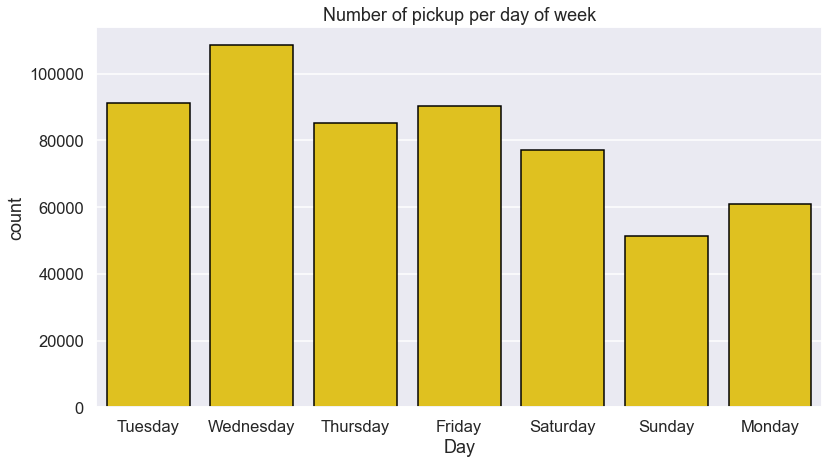

In [4]:
sns.set_context('talk')
sns.set_style('darkgrid')

days = {0: "Monday",
        1: "Tuesday",
        2: "Wednesday",
        3: "Thursday",
        4: "Friday",
        5: "Saturday",
        6: "Sunday"}

to_plot = df.copy()
to_plot['Day'] = [days.get(day) for day in list(df['Day'])]
plt.figure(figsize=(13,7))
sns.countplot(data=to_plot , x='Day' , color='gold' , edgecolor='black')
plt.title('Number of pickup per day of week')
plt.show()

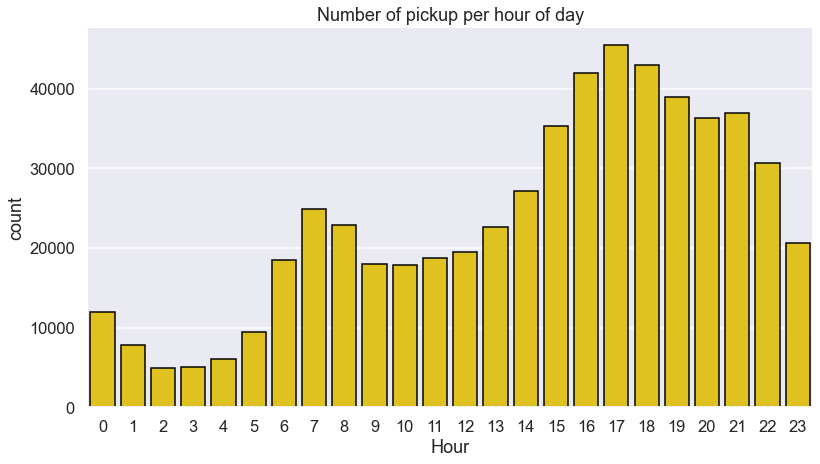

In [5]:
plt.figure(figsize=(13,7))
sns.countplot(data=df , x='Hour' , color='gold' , edgecolor='black')
plt.title('Number of pickup per hour of day')
plt.show()

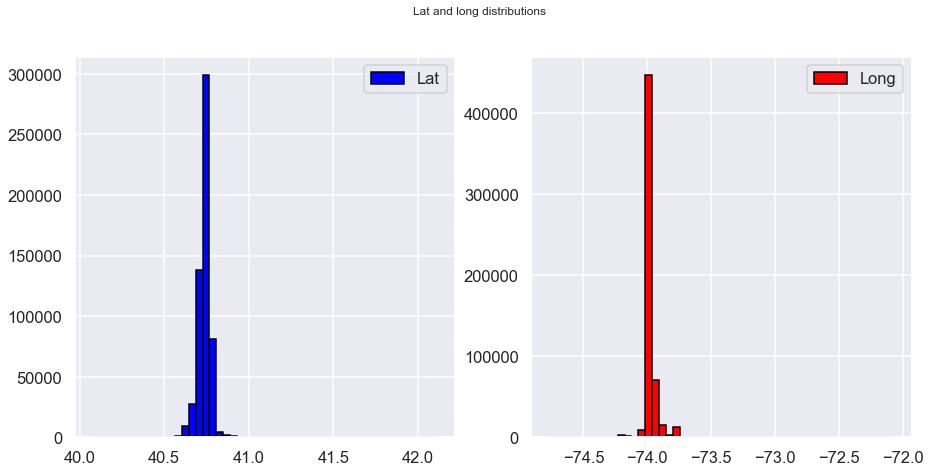

In [6]:
# Plot the distribution of lats and longs 
fig , (ax1 , ax2) = plt.subplots(1 , 2 , figsize=(15,7))
ax1.hist(df['Lat'] , bins=50 , edgecolor='black' , color='blue' , label='Lat')
ax2.hist(df['Lon'] , bins=50 , edgecolor='black' , color='red' , label='Long')
ax1.legend()
ax2.legend()
fig.suptitle('Lat and long distributions')
plt.show()

## Clustering using DBSCAN and OPTIC

In [7]:
# Standardize for clustering
training_df = df[(df['Day'] == 2) & (df['Hour'] == 17)][['Lat',	'Lon']]
testing_df = training_df.copy() # For visualisation
training_df[['Lat' , 'Lon']] = StandardScaler().fit_transform(training_df[['Lat' , 'Lon']])
print('Lenghts : ' , len(training_df))
training_df.head()

Lenghts :  9151


,Lat,Lon
1836,0.600695,-0.005955
1837,0.434677,-0.130422
1838,0.535590,-0.032285
1839,0.252382,0.118511
1840,-0.867429,-0.525365


In [8]:
dbscan = DBSCAN(metric='manhattan' , n_jobs=-1 , eps=0.2 , min_samples=10)
optics = OPTICS(metric='manhattan')

print('Fitting DBSCAN ...')
dbscan.fit(training_df)

print('Fitting OPTICS ...')
optics.fit(training_df)

Fitting DBSCAN ...
Fitting OPTICS ...


C:\Users\lucas\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_optics.py:932: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


OPTICS(metric='manhattan')

In [9]:
db_silhouete = silhouette_score(training_df , dbscan.labels_)
opt_silhouete = silhouette_score(training_df , optics.labels_)

print('Silhouette score for DBSCAN : ' , db_silhouete) # DBSCAN does a better work
print('Silhouette score for optics : ' , opt_silhouete)

Silhouette score for DBSCAN :  0.0716801778646233
Silhouette score for optics :  -0.035196495569851646


N of unique labels :  15


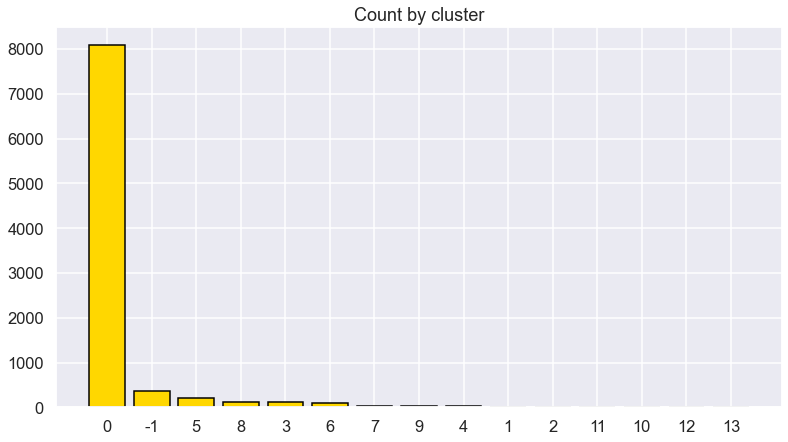

In [10]:
# Let's visualise the results
testing_df['Label'] = dbscan.labels_
print('N of unique labels : ' , testing_df.Label.nunique())


to_plot = testing_df.groupby('Label' , as_index=False)['Lat'].count().sort_values(by='Lat' , ascending=False)
plt.figure(figsize=(13,7))
plt.bar(to_plot['Label'].astype('str') , to_plot['Lat'] , color='gold' , edgecolor='black')
plt.title('Count by cluster')
plt.show()

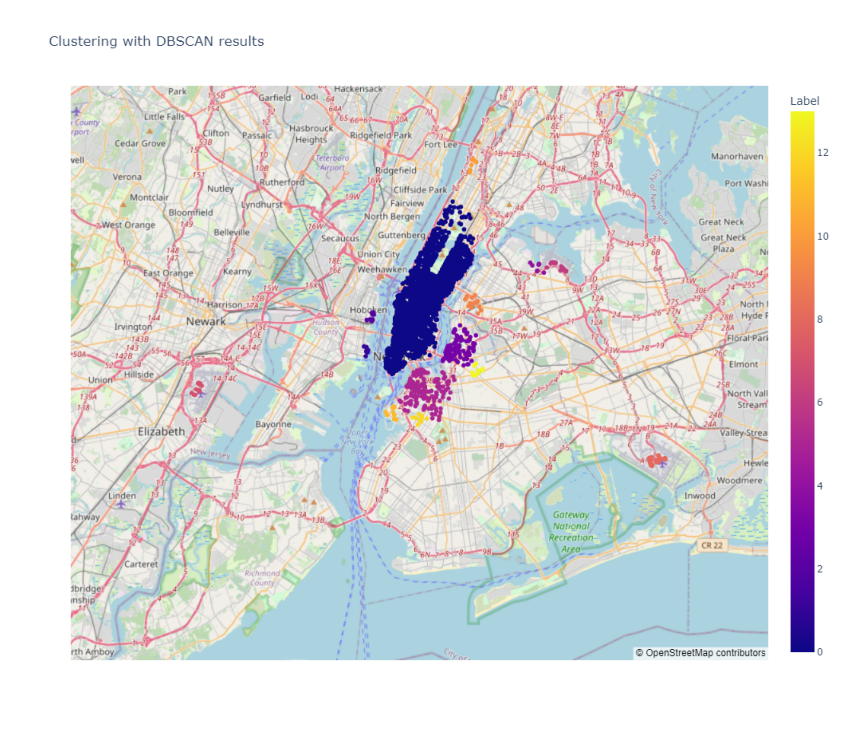

In [23]:
fig = px.scatter_mapbox(testing_df[testing_df['Label'] != -1], lat="Lat", lon="Lon", zoom = 10, # -1 is considered noise 
                        color = 'Label', color_discrete_sequence = px.colors.sequential.Inferno, template='plotly',
                        mapbox_style='open-street-map',width = 1050, height = 900,
                        title='Clustering with DBSCAN results')

img = plt.imread('newplot.png')

plt.figure(figsize=(15,15))
plt.xticks([])
plt.yticks([])
plt.imshow(img)
plt.show()

Now that I have chosen my algorithm and it's parameters , I will create a function to predict hot zone per day of week and hour.

In [12]:
def plot_hot_spot_per_hour_and_day(df : pd.DataFrame , day : str , hour : int):


    days = {"Monday" : 0,
        "Tuesday" : 1 ,
        "Wednesday" : 2,
        "Thursday" : 3,
        "Friday" : 4,
        "Saturday" : 5,
        "Sunday" : 6}
    
    string_day = day 
    day_ = days.get(day)

    model = DBSCAN(eps=0.2 , min_samples=10 , n_jobs=-1)
    subset = df[(df['Day'] == day_) & (df['Hour'] == hour)][['Lat' , 'Lon']]
    to_plot = subset.copy(deep=True)

    subset[['Lat' , 'Lon']] = StandardScaler().fit_transform(subset[['Lat' , 'Lon']])

    model.fit(subset)
    labels = model.labels_
    subset['Cluster'] = labels
    to_plot['Cluster'] = labels


    centroids , size_ , clusters  = [] , [] , []
    for label in set(labels):
        if label != -1: # -1 is Noise
            coords = to_plot[to_plot['Cluster'] == label][['Lat',	'Lon']].values
            centroid = list(np.mean(coords, axis=0))
            centroids.append(centroid)
            size_.append(len(to_plot[labels == label]))
            clusters.append(label)


    centroid_df = pd.DataFrame({'Lat' : np.array(centroids)[: , 0]  , 'Lon' : np.array(centroids)[: , 1] , 'N_pick_ups' : size_,
                            'Cluster' : clusters , 'Point_size' : [2 for i in range(len(centroids))]})
    

    fig = px.scatter_mapbox(centroid_df, lat="Lat", lon="Lon", zoom = 10, # -1 is considered noise 
                        color = 'Cluster', color_discrete_sequence = px.colors.sequential.Inferno, template='plotly',
                        mapbox_style='open-street-map',width = 1050, height = 900, size='Point_size',
                        title=f'Hot spots centroids for {string_day} at {hour} o clock',
                        
                        hover_data = {'Lat' : False , "Lon" : False , "N_pick_ups" : True , "Point_size" : False},
                        )

    fig.show()
    

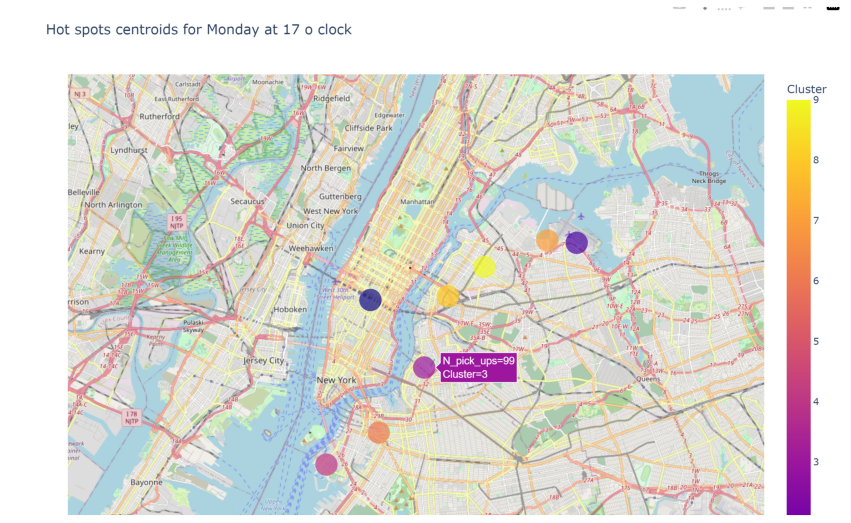

In [22]:
#plot_hot_spot_per_hour_and_day(df=df , day='Monday' , hour=17)
img = plt.imread('Capture d’écran (1291).png')

plt.figure(figsize=(15,15))
plt.xticks([])
plt.yticks([])
plt.imshow(img)
plt.show()